FLIGHT DATA ANOMALY DETECTION BASED ON AUTOMATIC DEPENDENT SURVEILLENCE BROADCASTING

In this project, flight data analysis will be carried out to identify anomalous data using the clustering method.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from scipy.spatial import distance

sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Flight Data LNI860 Surabaya-Palu

In [3]:
df = pd.read_csv('/content/drive/My Drive/dataset/full_line_cruise.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Timestamp,Date,Time,Traveling time (seconds),Callsign,Latitude,Longitude,Altitude,Speed,Direction,Day
0,1472719756,2016-09-01,08:49:16,0.0,LNI860,-2.407745,118.881660,41000,457,33,1
1,1472719695,2016-09-01,08:48:15,61.0,LNI860,-2.515732,118.809967,41000,455,34,1
2,1472719634,2016-09-01,08:47:14,61.0,LNI860,-2.622567,118.738579,41000,454,33,1
3,1472719573,2016-09-01,08:46:13,61.0,LNI860,-2.721085,118.657883,41000,449,43,1
4,1472719512,2016-09-01,08:45:12,61.0,LNI860,-2.814606,118.571297,41000,450,42,1


In [4]:
print('Amount of data : {} Raw, {} Column'.format(df.shape[0], df.shape[1]))

Amount of data : 4215 Raw, 11 Column


In [5]:
df = df.rename(columns={'Traveling time (seconds)':'TrvTime'})
df.head()

,Timestamp,Date,Time,TrvTime,Callsign,Latitude,Longitude,Altitude,Speed,Direction,Day
0,1472719756,2016-09-01,08:49:16,0.0,LNI860,-2.407745,118.881660,41000,457,33,1
1,1472719695,2016-09-01,08:48:15,61.0,LNI860,-2.515732,118.809967,41000,455,34,1
2,1472719634,2016-09-01,08:47:14,61.0,LNI860,-2.622567,118.738579,41000,454,33,1
3,1472719573,2016-09-01,08:46:13,61.0,LNI860,-2.721085,118.657883,41000,449,43,1
4,1472719512,2016-09-01,08:45:12,61.0,LNI860,-2.814606,118.571297,41000,450,42,1


In [6]:
df.isna().sum()

Timestamp    0
Date         0
Time         0
TrvTime      0
Callsign     0
Latitude     0
Longitude    0
Altitude     0
Speed        0
Direction    0
Day          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4215 entries, 0 to 4214
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  4215 non-null   int64  
 1   Date       4215 non-null   object 
 2   Time       4215 non-null   object 
 3   TrvTime    4215 non-null   float64
 4   Callsign   4215 non-null   object 
 5   Latitude   4215 non-null   float64
 6   Longitude  4215 non-null   float64
 7   Altitude   4215 non-null   int64  
 8   Speed      4215 non-null   int64  
 9   Direction  4215 non-null   int64  
 10  Day        4215 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 362.4+ KB


Cluster Latitude, Longitude, Speed

In [8]:
df_lls = df[['Longitude','Latitude','Speed']].copy()
df_lls.head()

,Longitude,Latitude,Speed
0,118.881660,-2.407745,457
1,118.809967,-2.515732,455
2,118.738579,-2.622567,454
3,118.657883,-2.721085,449
4,118.571297,-2.814606,450


In [9]:
mod_lls = KMeans(n_clusters=3, init='random', n_init=2, random_state=1)
label_lls = mod_lls.fit_predict(df_lls.values)

df_lls['Cluster'] = label_lls

df_lls.head()

,Longitude,Latitude,Speed,Cluster
0,118.881660,-2.407745,457,2
1,118.809967,-2.515732,455,2
2,118.738579,-2.622567,454,2
3,118.657883,-2.721085,449,1
4,118.571297,-2.814606,450,1


In [10]:
print(f'Number of iterations in the K-Means training process : {mod_lls.n_iter_}')

Number of iterations in the K-Means training process : 7


In [11]:
cl_0_lls = df_lls[df_lls.Cluster == 0]
cl_1_lls = df_lls[df_lls.Cluster == 1]
cl_2_lls = df_lls[df_lls.Cluster == 2]

colors = ["#26b99d", "#ff3f3f", "#f3ea5f"]

Cluster data frequency0 = 1014
Cluster data frequency1 = 1817
Cluster data frequency2 = 1384


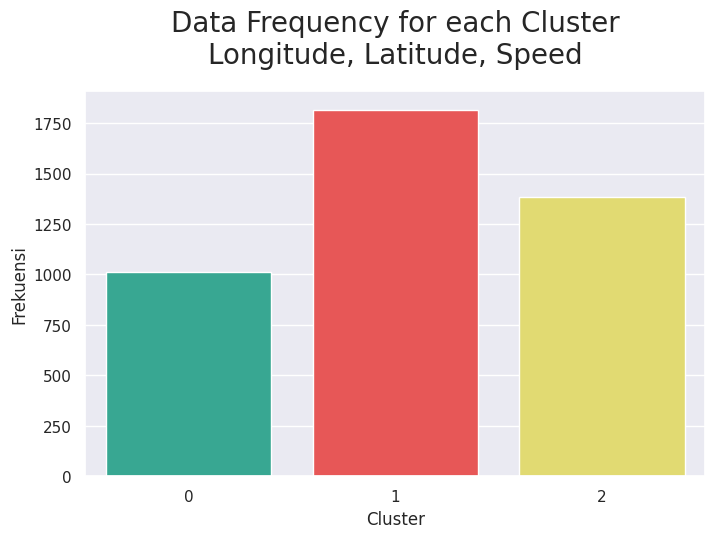

In [12]:
fig = plt.figure(figsize=(8, 5))
axes = fig.add_subplot()

axes = sns.countplot(x='Cluster', data=df_lls, palette=colors)
axes.set_title('Data Frequency for each Cluster\nLongitude, Latitude, Speed', fontsize=20, pad=20)
axes.set_ylabel('Frekuensi')

print(f'Cluster data frequency0 = {cl_0_lls.Cluster.count()}')
print(f'Cluster data frequency1 = {cl_1_lls.Cluster.count()}')
print(f'Cluster data frequency2 = {cl_2_lls.Cluster.count()}')

plt.show()

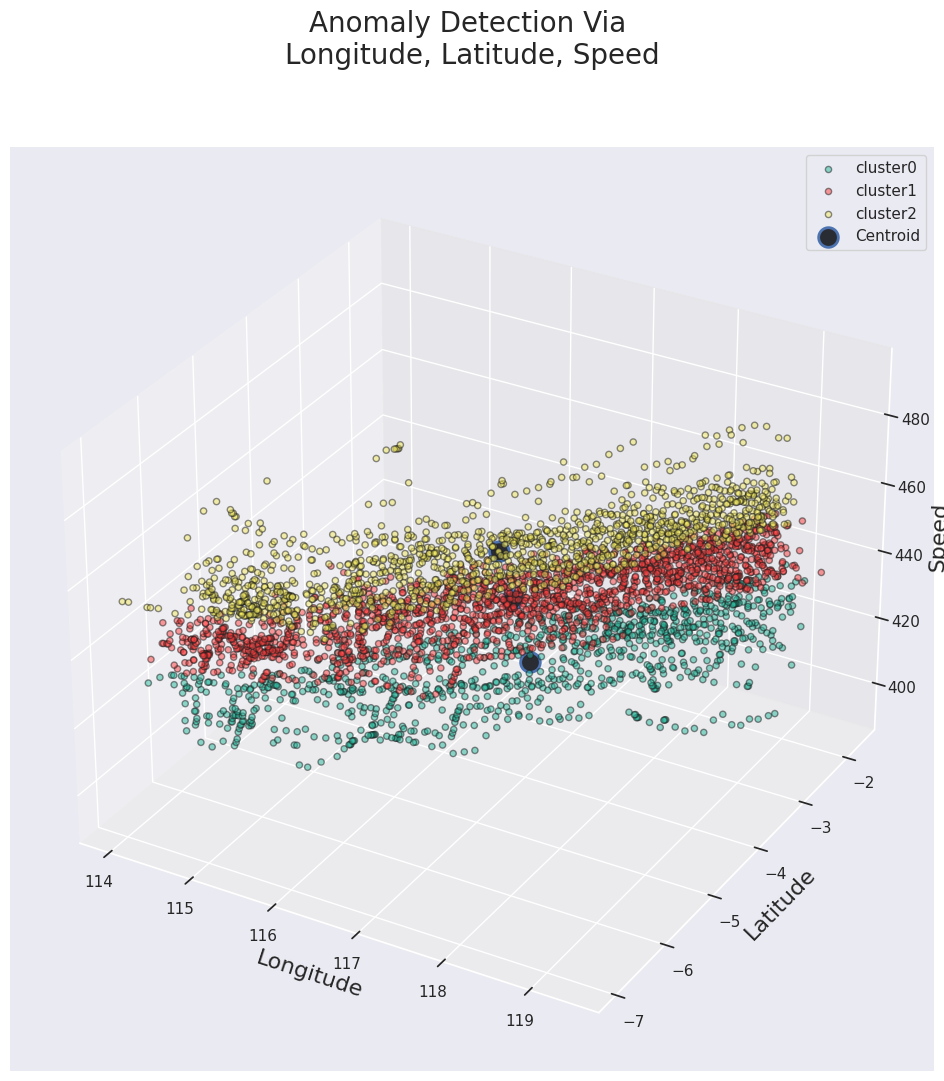

In [13]:
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(projection='3d')


ax.scatter3D(cl_0_lls.Longitude, cl_0_lls.Latitude, cl_0_lls.Speed, c='#26b99d', s=20, label='cluster0', alpha=0.5, edgecolor='k', lw=1)
ax.scatter3D(cl_1_lls.Longitude, cl_1_lls.Latitude, cl_1_lls.Speed, c="#ff3f3f", s=20, label='cluster1', alpha=0.5, edgecolor='k', lw=1)
ax.scatter3D(cl_2_lls.Longitude, cl_2_lls.Latitude, cl_2_lls.Speed, c="#f3ea5f", s=20, label='cluster2', alpha=0.5, edgecolor='k', lw=1)

ax.scatter3D(mod_lls.cluster_centers_[:,0], mod_lls.cluster_centers_[:,1], mod_lls.cluster_centers_[:, 2], marker='o', c="#2a2c33", s=200, label='Centroid', alpha=1, edgecolor='b', lw=2)

ax.set_title("Anomaly Detection Via \nLongitude, Latitude, Speed", pad=60, fontsize=20)
ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Latitude", fontsize=16)
ax.set_zlabel("Speed", fontsize=16)

ax.legend()

plt.show()

In [14]:
mod_lls.cluster_centers_

array([[117.21262012,  -4.26853822, 425.65680473],
       [117.06956828,  -4.39909232, 444.58778206],
       [116.98003338,  -4.50936406, 459.50794798]])

In [15]:
c0_lls = mod_lls.cluster_centers_[0]
c1_lls = mod_lls.cluster_centers_[1]
c2_lls = mod_lls.cluster_centers_[2]

dist_c0c1 = distance.euclidean(c0_lls, c1_lls)
dist_c0c2 = distance.euclidean(c0_lls, c2_lls)
dist_c1c2 = distance.euclidean(c1_lls, c2_lls)

print(f'Centroid Distance (c0,c1): {dist_c0c1}\nCentroid Distance (c0,c2): {dist_c0c2}\nCentroid Distance (c1,c2): {dist_c1c2}')

Centroid Distance (c0,c1): 18.931967955427233
Centroid Distance (c0,c2): 33.85279888786192
Centroid Distance (c1,c2): 14.920842046996121


Silhoutte Score Results 0.48767926731364275



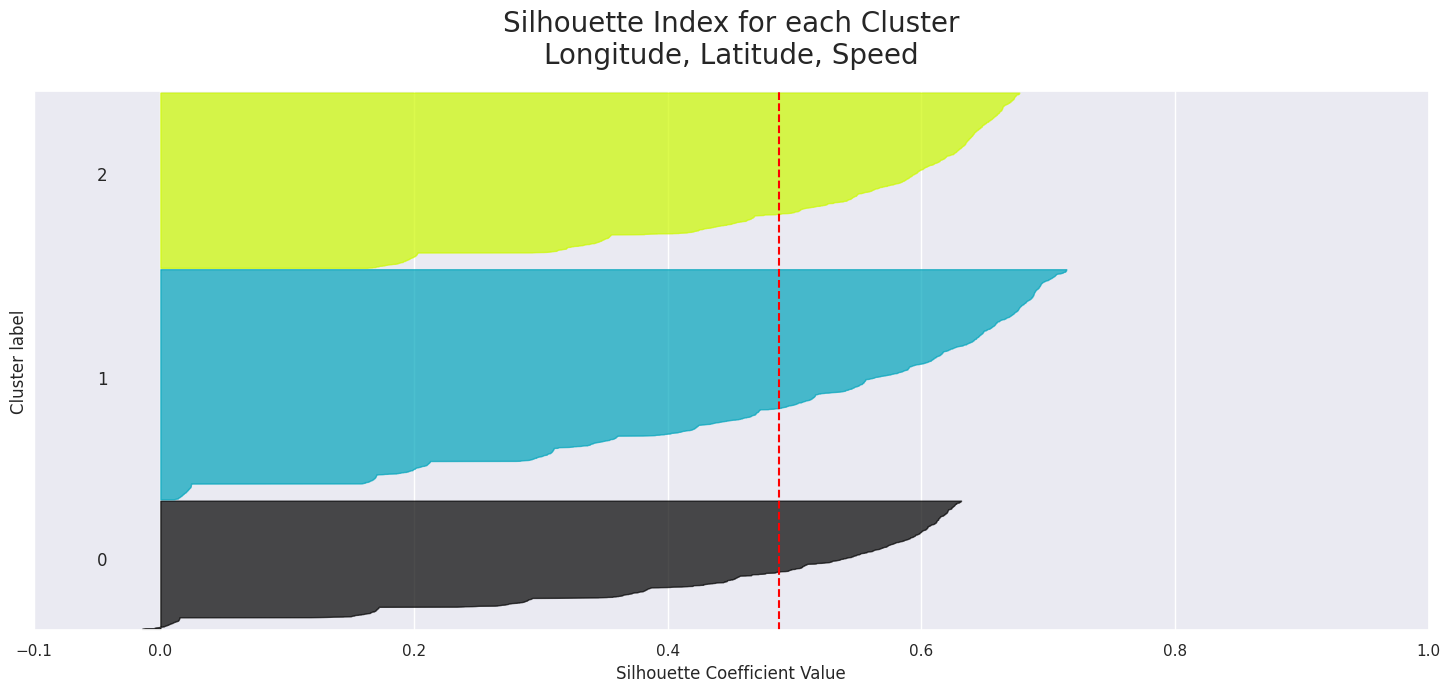

In [16]:
fig, axes = plt.subplots()
fig.set_size_inches(18,7)

axes.set_xlim([-0.1, 1])
axes.set_ylim([0, len(df_lls) + (3 + 1) * 10])

silavg_lls = silhouette_score(df_lls.values, label_lls)

print(f'Silhoutte Score Results {silavg_lls}')
print('')

sample_sil_lls = silhouette_samples(df_lls.values, label_lls)

y_lower = 10

for i in range(3):
  sample_silhoutte_label = sample_sil_lls[label_lls == i]
  sample_silhoutte_label.sort()
  size_cluster_i = sample_silhoutte_label.shape[0]
  y_upper = y_lower + size_cluster_i
  color = cm.nipy_spectral(float(i)/3)

  axes.fill_betweenx(np.arange(y_lower, y_upper), 0, sample_silhoutte_label, facecolor=color, edgecolor=color, alpha=0.7)
  axes.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
  y_lower = y_upper + 10

axes.set_title("Silhouette Index for each Cluster\nLongitude, Latitude, Speed", fontsize=20, pad=20)
axes.set_xlabel("Silhouette Coefficient Value")
axes.set_ylabel("Cluster label")

axes.axvline(x=silavg_lls, color="red", linestyle="--")
axes.set_yticks([])
axes.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [17]:
max_lls_0, min_lls_0 = np.max(sample_sil_lls[label_lls==0]), np.min(sample_sil_lls[label_lls==0])
max_lls_1, min_lls_1 = np.max(sample_sil_lls[label_lls==1]), np.min(sample_sil_lls[label_lls==1])
max_lls_2, min_lls_2 = np.max(sample_sil_lls[label_lls==2]), np.min(sample_sil_lls[label_lls==2])

print(f'Silhouette value range: {np.min(sample_sil_lls)}, {np.max(sample_sil_lls)}')
print("")
print(f'cluster silhouette value 0 = {np.average(sample_sil_lls[label_lls==0])}')
print(f'cluster silhouette value 1 = {np.average(sample_sil_lls[label_lls==1])}')
print(f'cluster silhouette value 2 = {np.average(sample_sil_lls[label_lls==2])}')
print("")
print(f'Range of silhouette values ​​in the cluster 0 = {min_lls_0}, {max_lls_0}')
print(f'Range of silhouette values ​​in the cluster 1 = {min_lls_1}, {max_lls_1}')
print(f'Range of silhouette values ​​in the cluster 2 = {min_lls_2}, {max_lls_2}')

Silhouette value range: -0.014499813360462554, 0.7143338144308408

cluster silhouette value 0 = 0.43948811334038596
cluster silhouette value 1 = 0.4855199203697205
cluster silhouette value 2 = 0.5258218710173923

Range of silhouette values ​​in the cluster 0 = -0.014499813360462554, 0.6313950506056897
Range of silhouette values ​​in the cluster 1 = 0.010974787151256025, 0.7143338144308408
Range of silhouette values ​​in the cluster 2 = 0.16275317687527052, 0.6772911997446089


# Cluster Longitude, Latitude, TrvTime

In [18]:
df_llt = df[['Longitude','Latitude','TrvTime']].copy()

df_llt.head()

,Longitude,Latitude,TrvTime
0,118.881660,-2.407745,0.0
1,118.809967,-2.515732,61.0
2,118.738579,-2.622567,61.0
3,118.657883,-2.721085,61.0
4,118.571297,-2.814606,61.0


In [19]:
mod_llt = KMeans(n_clusters=3, init='random', n_init=3, random_state=0)
label_llt = mod_llt.fit_predict(df_llt.values)


df_llt['Cluster'] = label_llt
df_llt.head()

,Longitude,Latitude,TrvTime,Cluster
0,118.881660,-2.407745,0.0,2
1,118.809967,-2.515732,61.0,0
2,118.738579,-2.622567,61.0,0
3,118.657883,-2.721085,61.0,0
4,118.571297,-2.814606,61.0,0


In [20]:
print(f'Number of iterations in the K-Means training process : {mod_llt.n_iter_}')

Number of iterations in the K-Means training process : 10


In [21]:
cl_0_llt = df_llt[df_llt.Cluster == 0]
cl_1_llt = df_llt[df_llt.Cluster == 1]
cl_2_llt = df_llt[df_llt.Cluster == 2]

Cluster data frequency0 = 3352
Cluster data frequency1 = 41
Cluster data frequency2 = 822


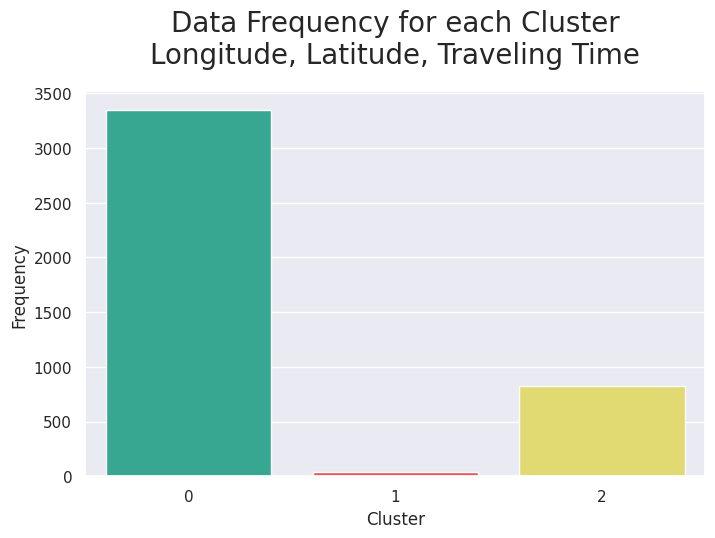

In [22]:
fig = plt.figure(figsize=(8, 5))
axes = fig.add_subplot()

axes = sns.countplot(x='Cluster', data=df_llt, palette=colors)
axes.set_title('Data Frequency for each Cluster\nLongitude, Latitude, Traveling Time', fontsize=20, pad=20)
axes.set_ylabel('Frequency')

print(f'Cluster data frequency0 = {cl_0_llt.Cluster.count()}')
print(f'Cluster data frequency1 = {cl_1_llt.Cluster.count()}')
print(f'Cluster data frequency2 = {cl_2_llt.Cluster.count()}')

plt.show()

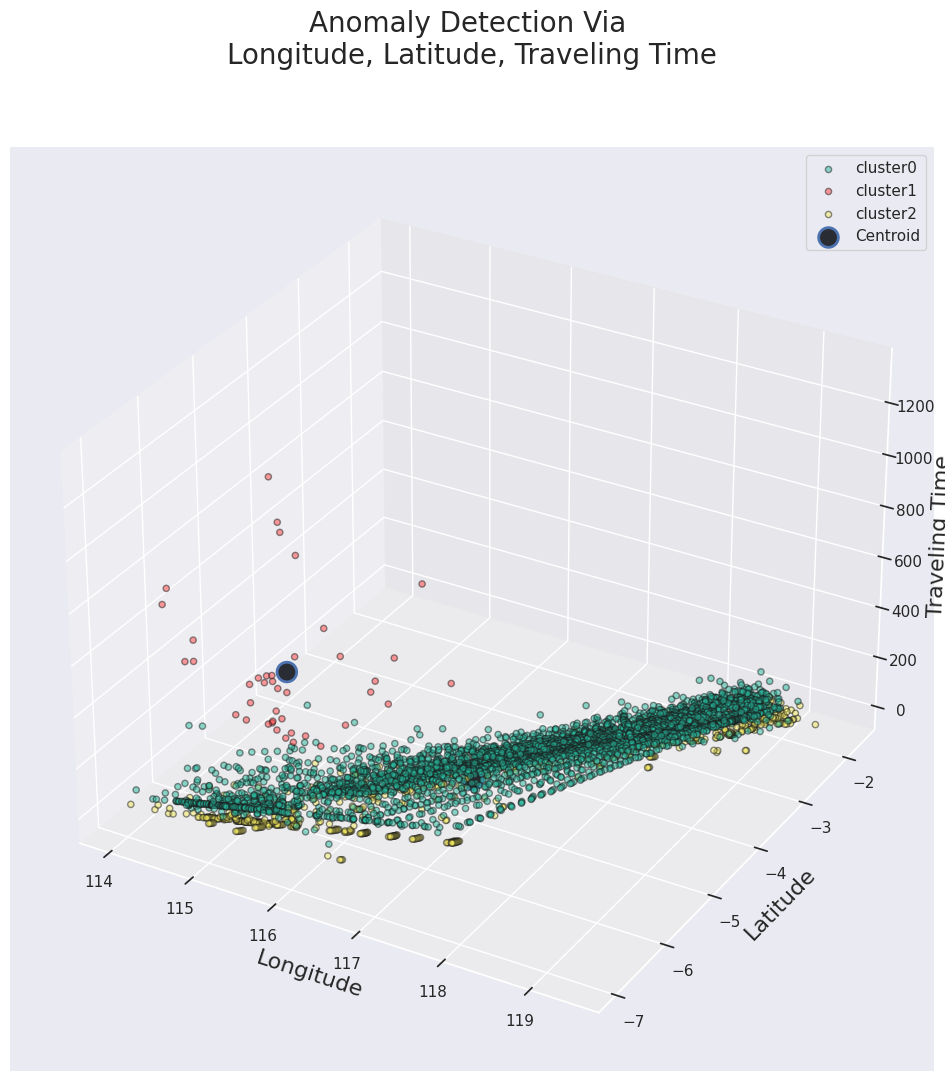

In [23]:
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(projection='3d')


ax.scatter3D(cl_0_llt.Longitude, cl_0_llt.Latitude, cl_0_llt.TrvTime, c='#26b99d', s=20, label='cluster0', alpha=0.5, edgecolor='k', lw=1)
ax.scatter3D(cl_1_llt.Longitude, cl_1_llt.Latitude, cl_1_llt.TrvTime, c="#ff3f3f", s=20, label='cluster1', alpha=0.5, edgecolor='k', lw=1)
ax.scatter3D(cl_2_llt.Longitude, cl_2_llt.Latitude, cl_2_llt.TrvTime, c="#f3ea5f", s=20, label='cluster2', alpha=0.5, edgecolor='k', lw=1)

ax.scatter3D(mod_llt.cluster_centers_[:,0], mod_llt.cluster_centers_[:,1], mod_llt.cluster_centers_[:, 2], marker='o', c="#2a2c33", s=200, label='Centroid', alpha=1, edgecolor='b', lw=2)

ax.set_title("Anomaly Detection Via \nLongitude, Latitude, Traveling Time", pad=60, fontsize=20)
ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Latitude", fontsize=16)
ax.set_zlabel("Traveling Time", fontsize=16)

ax.legend()
# ax.view_init(30, 90)

plt.show()



In [24]:
mod_llt.cluster_centers_

array([[117.15959993,  -4.2967754 ,  67.75119332],
       [115.43965151,  -6.13758359, 546.12195122],
       [116.80944513,  -4.75422905,  11.59610706]])

In [25]:
c0_llt = mod_llt.cluster_centers_[0]
c1_llt = mod_llt.cluster_centers_[1]
c2_llt = mod_llt.cluster_centers_[2]

dist_c0c1 = distance.euclidean(c0_llt, c1_llt)
dist_c0c2 = distance.euclidean(c0_llt, c2_llt)
dist_c1c2 = distance.euclidean(c1_llt, c2_llt)

print(f'Centroid Distance (c0,c1): {dist_c0c1}\nCentroid Distance (c0,c2): {dist_c0c2}\nCentroid Distance (c1,c2): {dist_c1c2}')

Centroid Distance (c0,c1): 478.37739161999156
Centroid Distance (c0,c2): 56.15804114513863
Centroid Distance (c1,c2): 534.5293893539189


Silhoutte Score Results 0.7552015142304224



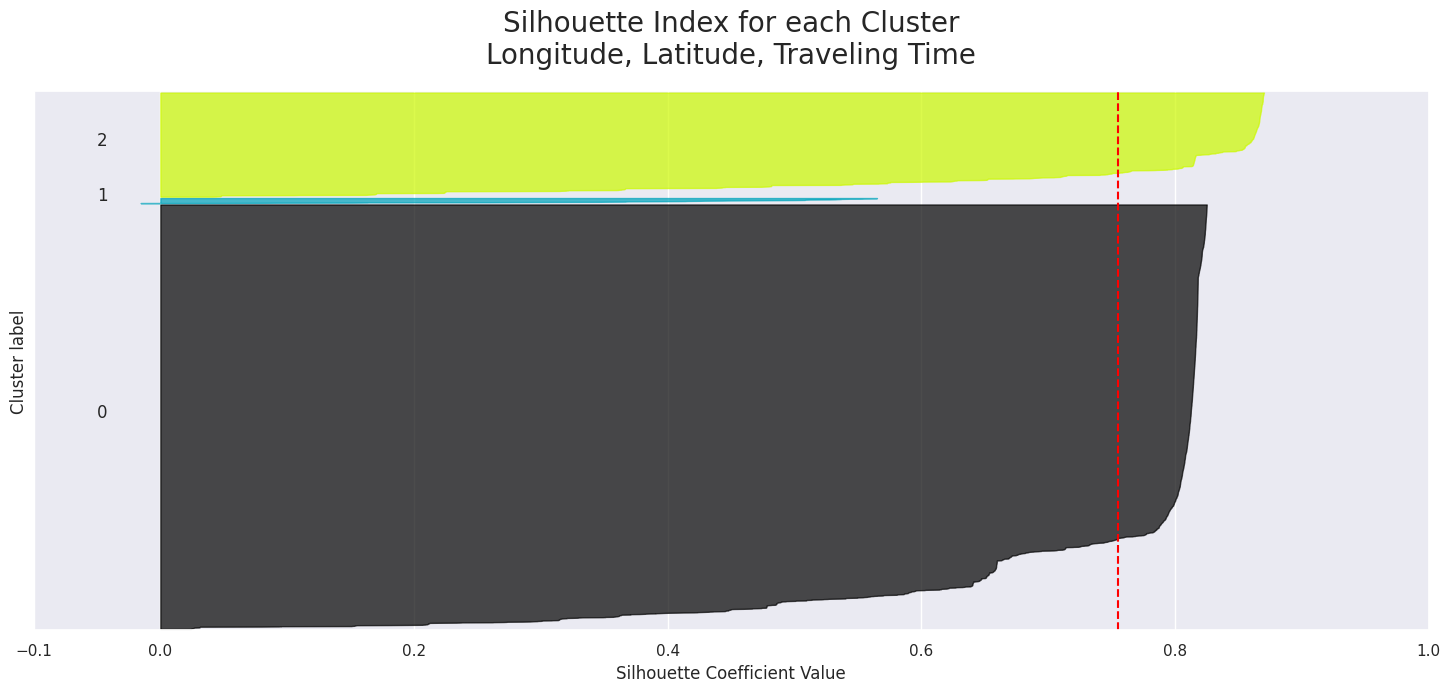

In [26]:
fig, axes = plt.subplots()
fig.set_size_inches(18,7)

axes.set_xlim([-0.1, 1])
axes.set_ylim([0, len(df_lls) + (3 + 1) * 10])

silavg_llt = silhouette_score(df_llt.values, label_llt)

print(f'Silhoutte Score Results {silavg_llt}')
print('')

sample_sil_llt = silhouette_samples(df_llt.values, label_llt)

y_lower = 10

for i in range(3):
  sample_silhoutte_label = sample_sil_llt[label_llt == i]
  sample_silhoutte_label.sort()
  size_cluster_i = sample_silhoutte_label.shape[0]
  y_upper = y_lower + size_cluster_i
  color = cm.nipy_spectral(float(i)/3)

  axes.fill_betweenx(np.arange(y_lower, y_upper), 0, sample_silhoutte_label, facecolor=color, edgecolor=color, alpha=0.7)
  axes.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
  y_lower = y_upper + 10

axes.set_title("Silhouette Index for each Cluster\nLongitude, Latitude, Traveling Time", fontsize=20, pad=20)
axes.set_xlabel("Silhouette Coefficient Value")
axes.set_ylabel("Cluster label")

axes.axvline(x=silavg_llt, color="red", linestyle="--")
axes.set_yticks([])
axes.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [27]:
max_llt_0, min_llt_0 = np.max(sample_sil_llt[label_llt==0]), np.min(sample_sil_llt[label_llt==0])
max_llt_1, min_llt_1 = np.max(sample_sil_llt[label_llt==1]), np.min(sample_sil_llt[label_llt==1])
max_llt_2, min_llt_2 = np.max(sample_sil_llt[label_llt==2]), np.min(sample_sil_llt[label_llt==2])

print(f'Silhouette value range: {np.min(sample_sil_llt)}, {np.max(sample_sil_llt)}')
print("")
print(f'cluster silhouette value 0 = {np.average(sample_sil_llt[label_llt==0])}')
print(f'cluster silhouette value 1 = {np.average(sample_sil_llt[label_llt==1])}')
print(f'cluster silhouette value 2 = {np.average(sample_sil_llt[label_llt==2])}')
print("")
print(f'Range of silhouette values ​​in the cluster 0 = {min_llt_0}, {max_llt_0}')
print(f'Range of silhouette values ​​in the cluster 1 = {min_llt_1}, {max_llt_1}')
print(f'Range of silhouette values ​​in the cluster 2 = {min_llt_2}, {max_llt_2}')

Silhouette value range: -0.015609455508889513, 0.8702127582621101

cluster silhouette value 0 = 0.7576065545015849
cluster silhouette value 1 = 0.3984673458604842
cluster silhouette value 2 = 0.7631874095032088

Range of silhouette values ​​in the cluster 0 = 0.02395651568813319, 0.8250584882217863
Range of silhouette values ​​in the cluster 1 = -0.015609455508889513, 0.5650621706309679
Range of silhouette values ​​in the cluster 2 = 0.04040540321272183, 0.8702127582621101


# Cluster Speed, Travel Time

In [28]:
df_ts = df[['TrvTime','Speed']].copy()

df_ts.head()

,TrvTime,Speed
0,0.0,457
1,61.0,455
2,61.0,454
3,61.0,449
4,61.0,450


In [29]:
mod_ts = KMeans(n_clusters=3, init='random', n_init=2, random_state=10)
label_ts = mod_ts.fit_predict(df_ts.values)

df_ts['Cluster'] = mod_ts.labels_

df_ts.head()

,TrvTime,Speed,Cluster
0,0.0,457,2
1,61.0,455,1
2,61.0,454,1
3,61.0,449,1
4,61.0,450,1


In [30]:
print(f'Number of iterations in the K-Means training process : {mod_ts.n_iter_}')

Number of iterations in the K-Means training process : 7


In [31]:
cl_0_ts = df_ts[df_ts.Cluster == 0]
cl_1_ts = df_ts[df_ts.Cluster == 1]
cl_2_ts = df_ts[df_ts.Cluster == 2]

Cluster data frequency0 = 42
Cluster data frequency1 = 3351
Cluster data frequency2 = 822


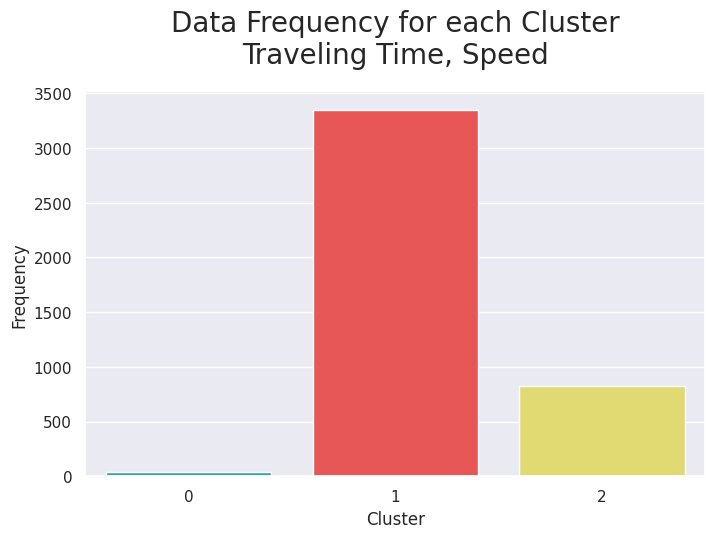

In [32]:
fig = plt.figure(figsize=(8, 5))
axes = fig.add_subplot()

axes = sns.countplot(x='Cluster', data=df_ts, palette=colors)
axes.set_title('Data Frequency for each Cluster\nTraveling Time, Speed', fontsize=20, pad=20)
axes.set_ylabel('Frequency')

print(f'Cluster data frequency0 = {cl_0_ts.Cluster.count()}')
print(f'Cluster data frequency1 = {cl_1_ts.Cluster.count()}')
print(f'Cluster data frequency2 = {cl_2_ts.Cluster.count()}')

plt.show()

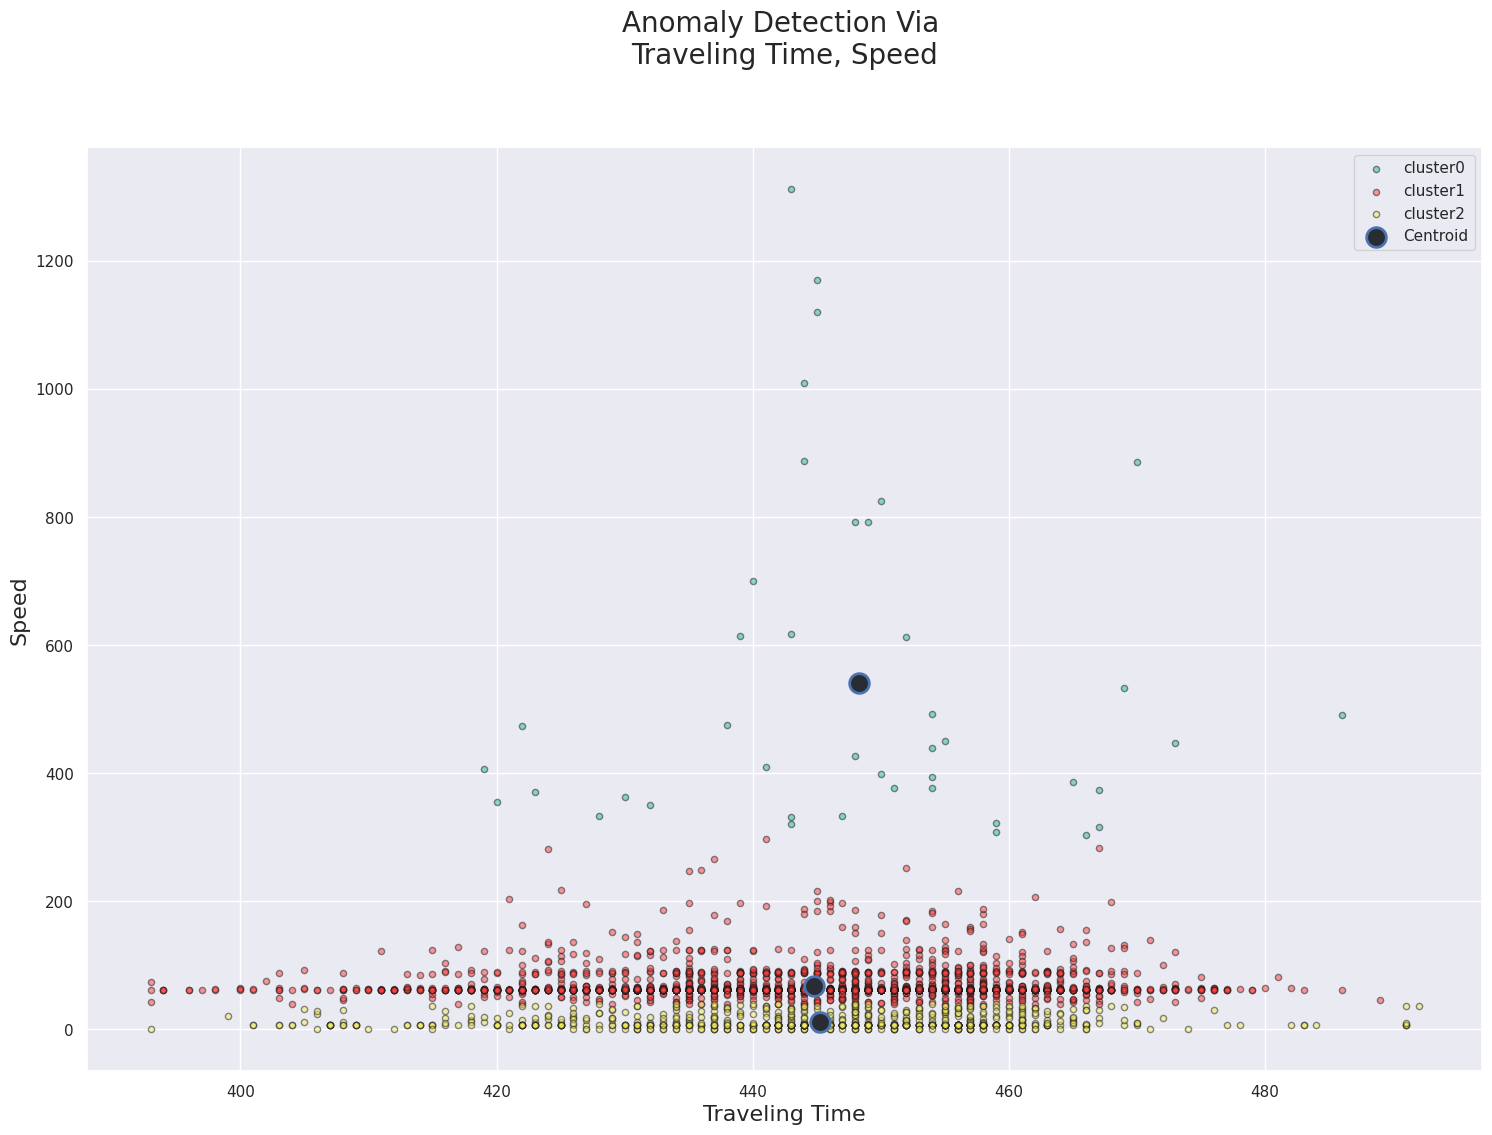

In [33]:
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot()


ax.scatter(cl_0_ts.Speed, cl_0_ts.TrvTime, c='#26b99d', s=20, label='cluster0', alpha=0.5, edgecolor='k', lw=1)
ax.scatter(cl_1_ts.Speed, cl_1_ts.TrvTime, c="#ff3f3f", s=20, label='cluster1', alpha=0.5, edgecolor='k', lw=1)
ax.scatter(cl_2_ts.Speed, cl_2_ts.TrvTime, c="#f3ea5f", s=20, label='cluster2', alpha=0.5, edgecolor='k', lw=1)

ax.scatter(mod_ts.cluster_centers_[:,1], mod_ts.cluster_centers_[:,0], marker='o', c="#2a2c33", s=200, label='Centroid', alpha=1, edgecolor='b', lw=2)

ax.set_title("Anomaly Detection Via \nTraveling Time, Speed", pad=60, fontsize=20)
ax.set_xlabel("Traveling Time", fontsize=16)
ax.set_ylabel("Speed", fontsize=16)

ax.legend()

plt.show()

In [34]:
mod_ts.cluster_centers_

array([[540.35714286, 448.30952381],
       [ 67.68069233, 444.81886004],
       [ 11.59610706, 445.22384428]])

In [35]:
c0_ts = mod_ts.cluster_centers_[0]
c1_ts = mod_ts.cluster_centers_[1]
c2_ts = mod_ts.cluster_centers_[2]

dist_c0c1 = distance.euclidean(c0_ts, c1_ts)
dist_c0c2 = distance.euclidean(c0_ts, c2_ts)
dist_c1c2 = distance.euclidean(c1_ts, c2_ts)

print(f'Centroid Distance (c0,c1): {dist_c0c1}\nCentroid Distance (c0,c2): {dist_c0c2}\nCentroid Distance (c1,c2): {dist_c1c2}')

Centroid Distance (c0,c1): 472.68933943539065
Centroid Distance (c0,c2): 528.770039241714
Centroid Distance (c1,c2): 56.08604744202063


Silhoutte Score results 0.5915131097444146



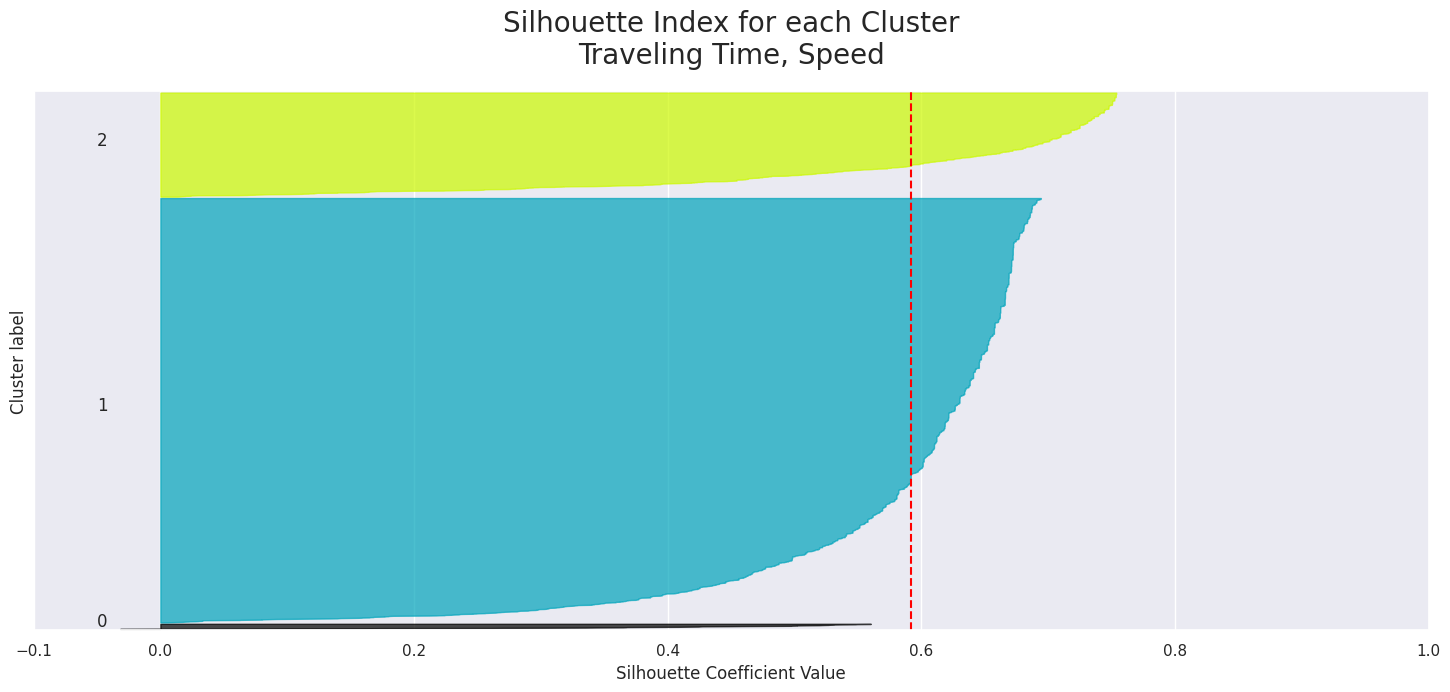

In [36]:
fig, axes = plt.subplots()
fig.set_size_inches(18,7)

axes.set_xlim([-0.1, 1])
axes.set_ylim([0, len(df_lls) + (3 + 1) * 10])

silavg_ts = silhouette_score(df_ts.values, label_ts)

print(f'Silhoutte Score results {silavg_ts}')
print('')

sample_sil_ts = silhouette_samples(df_ts.values, label_ts)

y_lower = 10

for i in range(3):
  sample_silhoutte_label = sample_sil_ts[label_ts == i]
  sample_silhoutte_label.sort()
  size_cluster_i = sample_silhoutte_label.shape[0]
  y_upper = y_lower + size_cluster_i
  color = cm.nipy_spectral(float(i)/3)

  axes.fill_betweenx(np.arange(y_lower, y_upper), 0, sample_silhoutte_label, facecolor=color, edgecolor=color, alpha=0.7)
  axes.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
  y_lower = y_upper + 10

axes.set_title("Silhouette Index for each Cluster\nTraveling Time, Speed", fontsize=20, pad=20)
axes.set_xlabel("Silhouette Coefficient Value")
axes.set_ylabel("Cluster label")

axes.axvline(x=silavg_ts, color="red", linestyle="--")
axes.set_yticks([])
axes.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [37]:
max_ts_0, min_ts_0 = np.max(sample_sil_ts[label_ts==0]), np.min(sample_sil_ts[label_ts==0])
max_ts_1, min_ts_1 = np.max(sample_sil_ts[label_ts==1]), np.min(sample_sil_ts[label_ts==1])
max_ts_2, min_ts_2 = np.max(sample_sil_ts[label_ts==2]), np.min(sample_sil_ts[label_ts==2])

print(f'Silhouette value range: {np.min(sample_sil_ts)}, {np.max(sample_sil_ts)}')
print("")
print(f'cluster silhouette value 0 = {np.average(sample_sil_ts[label_ts==0])}')
print(f'cluster silhouette value 1 = {np.average(sample_sil_ts[label_ts==1])}')
print(f'cluster silhouette value 2 = {np.average(sample_sil_ts[label_ts==2])}')
print("")
print(f'Range of silhouette values ​​in the cluster 0 = {min_ts_0}, {max_ts_0}')
print(f'Range of silhouette values ​​in the cluster 1 = {min_ts_1}, {max_ts_1}')
print(f'Range of silhouette values ​​in the cluster 2 = {min_ts_2}, {max_ts_2}')

Silhouette value range: -0.03168272510225374, 0.7537094517211643

cluster silhouette value 0 = 0.38576292617087854
cluster silhouette value 1 = 0.589655101770154
cluster silhouette value 2 = 0.6096003268147746

Range of silhouette values ​​in the cluster 0 = -0.03168272510225374, 0.5601901507865508
Range of silhouette values ​​in the cluster 1 = 0.006328980237359142, 0.6942687934939225
Range of silhouette values ​​in the cluster 2 = 0.01291503105449106, 0.7537094517211643


# Cluster Longitude, Latitude

In [38]:
df_ll = df[['Longitude','Latitude']].copy()

df_ll.head()

,Longitude,Latitude
0,118.881660,-2.407745
1,118.809967,-2.515732
2,118.738579,-2.622567
3,118.657883,-2.721085
4,118.571297,-2.814606


In [39]:
mod_ll = KMeans(n_clusters=3, init='random', n_init=1, random_state=5)
label_ll = mod_ll.fit_predict(df_ll.values)

df_ll['Cluster'] = mod_ll.labels_

df_ll.head()

,Longitude,Latitude,Cluster
0,118.881660,-2.407745,0
1,118.809967,-2.515732,0
2,118.738579,-2.622567,0
3,118.657883,-2.721085,0
4,118.571297,-2.814606,0


In [40]:
print(f'Number of iterations in the K-Means training process : {mod_ll.n_iter_}')

Number of iterations in the K-Means training process : 6


In [41]:
cl_0_ll = df_ll[df_ll.Cluster == 0]
cl_1_ll = df_ll[df_ll.Cluster == 1]
cl_2_ll = df_ll[df_ll.Cluster == 2]

Cluster data frequency0 = 1531
Cluster data frequency1 = 1253
Cluster data frequency2 = 1431


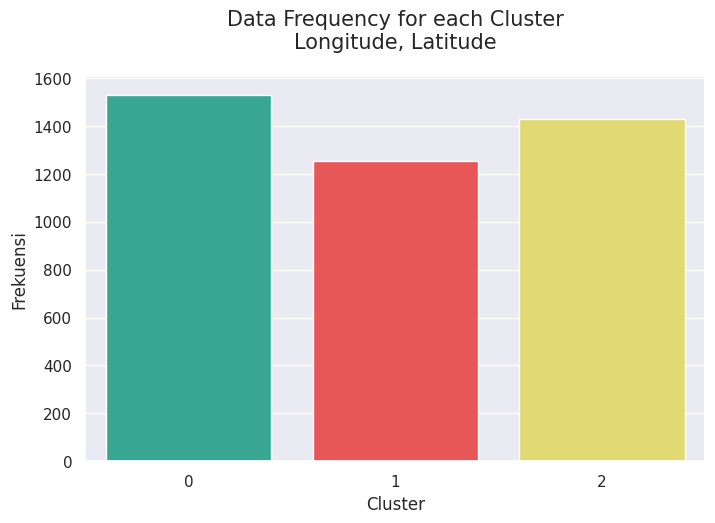

In [42]:
fig = plt.figure(figsize=(8, 5))
axes = fig.add_subplot()

axes = sns.countplot(x='Cluster', data=df_ll, palette=colors)
axes.set_title('Data Frequency for each Cluster\nLongitude, Latitude', fontsize=15, pad=20)
axes.set_ylabel('Frekuensi')

print(f'Cluster data frequency0 = {cl_0_ll.Cluster.count()}')
print(f'Cluster data frequency1 = {cl_1_ll.Cluster.count()}')
print(f'Cluster data frequency2 = {cl_2_ll.Cluster.count()}')

plt.show()

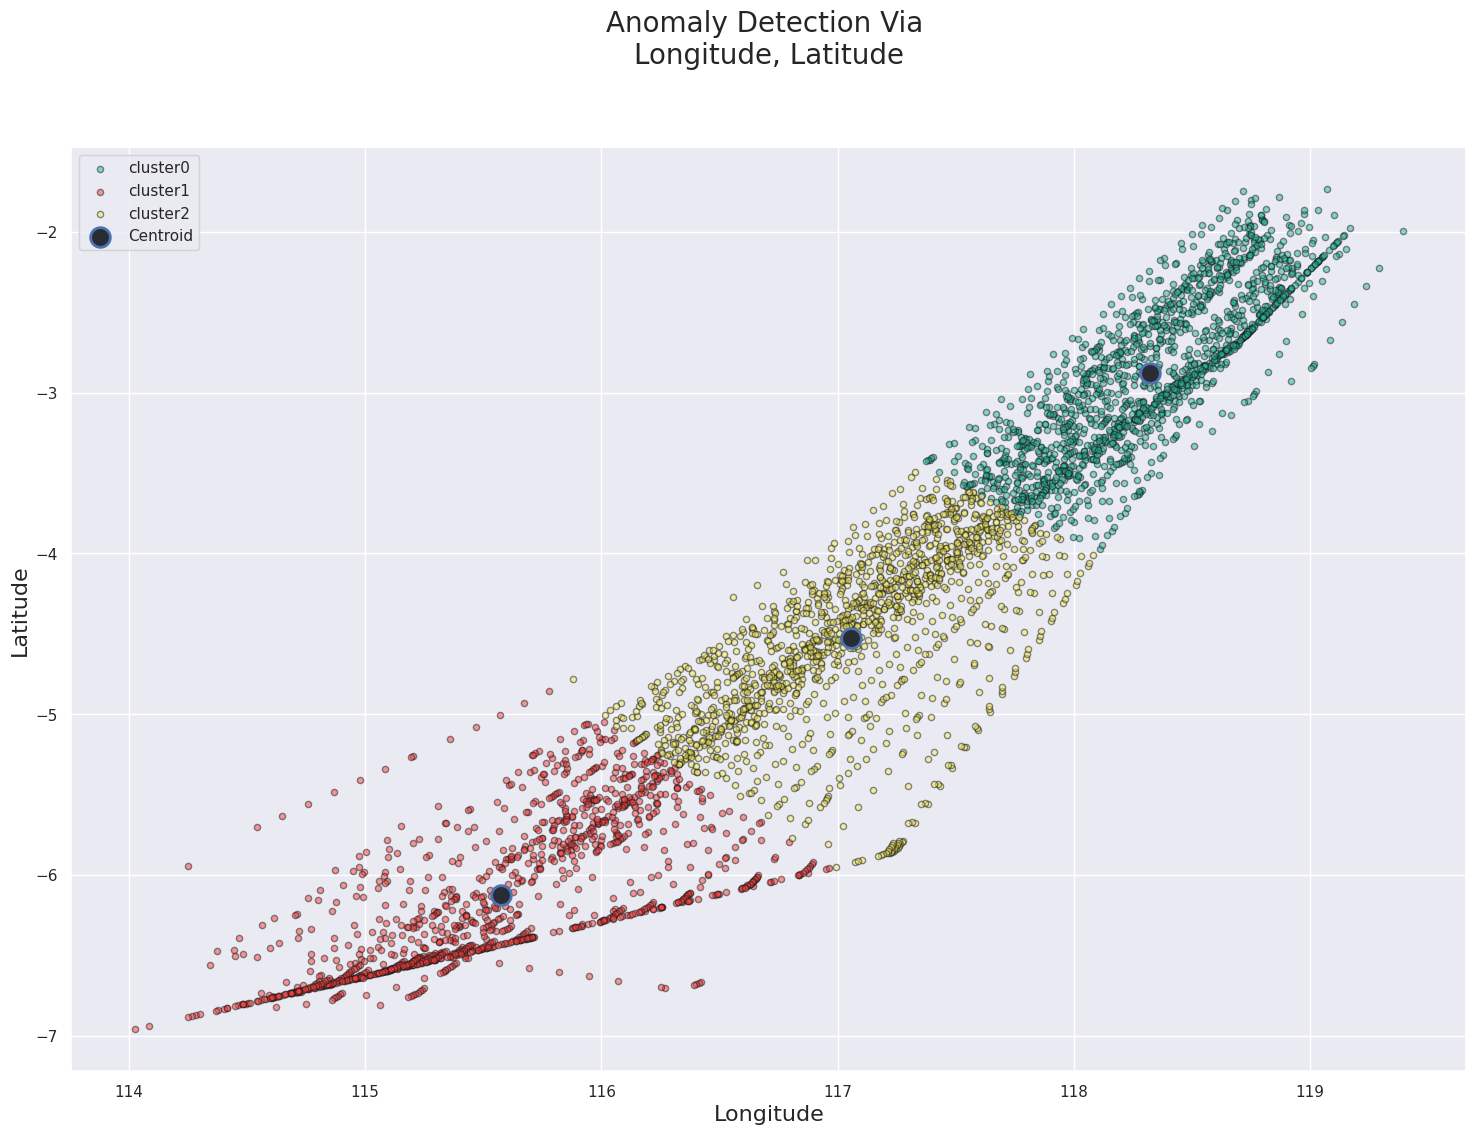

In [43]:
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot()


ax.scatter(cl_0_ll.Longitude, cl_0_ll.Latitude, c='#26b99d', s=20, label='cluster0', alpha=0.5, edgecolor='k', lw=1)
ax.scatter(cl_1_ll.Longitude, cl_1_ll.Latitude, c="#ff3f3f", s=20, label='cluster1', alpha=0.5, edgecolor='k', lw=1)
ax.scatter(cl_2_ll.Longitude, cl_2_ll.Latitude, c="#f3ea5f", s=20, label='cluster2', alpha=0.5, edgecolor='k', lw=1)

ax.scatter(mod_ll.cluster_centers_[:,0], mod_ll.cluster_centers_[:,1], marker='o', c="#2a2c33", s=200, label='Centroid', alpha=1, edgecolor='b', lw=2)

ax.set_title("Anomaly Detection Via \nLongitude, Latitude", pad=60, fontsize=20)
ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Latitude", fontsize=16)

ax.legend()

plt.show()

In [44]:
mod_ll.cluster_centers_

array([[118.32295345,  -2.87715562],
       [115.57537271,  -6.1240234 ],
       [117.05819307,  -4.52316564]])

In [45]:
c0_ll = mod_ll.cluster_centers_[0]
c1_ll = mod_ll.cluster_centers_[1]
c2_ll = mod_ll.cluster_centers_[2]

dist_c0c1 = distance.euclidean(c0_ll, c1_ll)
dist_c0c2 = distance.euclidean(c0_ll, c2_ll)
dist_c1c2 = distance.euclidean(c1_ll, c2_ll)

print(f'Centroid Distance (c0,c1): {dist_c0c1}\nCentroid Distance (c0,c2): {dist_c0c2}\nCentroid Distance (c1,c2): {dist_c1c2}')

Centroid Distance (c0,c1): 4.253392796023801
Centroid Distance (c0,c2): 2.075805335712243
Centroid Distance (c1,c2): 2.182086567344258


Silhoutte Score Results 0.6616584361924325



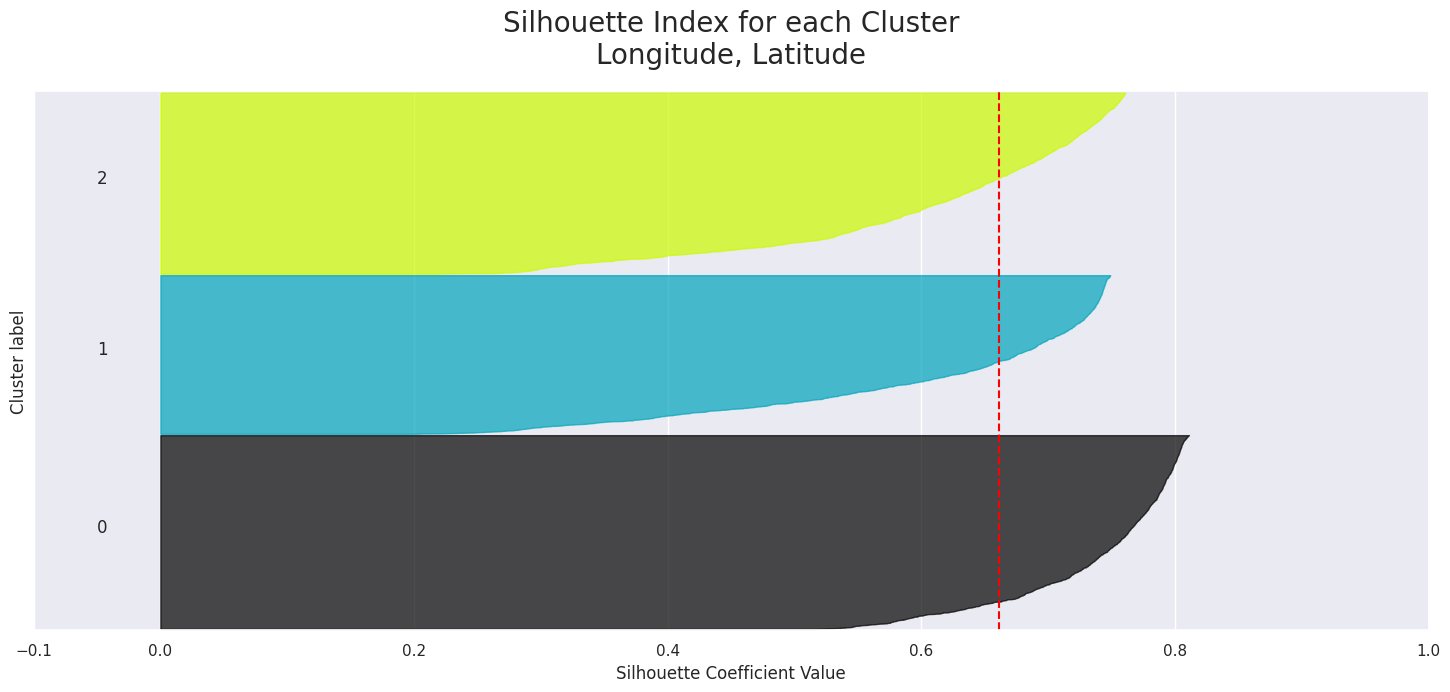

In [46]:
fig, axes = plt.subplots()
fig.set_size_inches(18,7)

axes.set_xlim([-0.1, 1])
axes.set_ylim([0, len(df_lls) + (3 + 1) * 10])

silavg_ll = silhouette_score(df_ll.values, label_ll)

print(f'Silhoutte Score Results {silavg_ll}')
print('')

sample_sil_ll = silhouette_samples(df_ll.values, label_ll)

y_lower = 10

for i in range(3):
  sample_silhoutte_label = sample_sil_ll[label_ll == i]
  sample_silhoutte_label.sort()
  size_cluster_i = sample_silhoutte_label.shape[0]
  y_upper = y_lower + size_cluster_i
  color = cm.nipy_spectral(float(i)/3)

  axes.fill_betweenx(np.arange(y_lower, y_upper), 0, sample_silhoutte_label, facecolor=color, edgecolor=color, alpha=0.7)
  axes.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
  y_lower = y_upper + 10

axes.set_title("Silhouette Index for each Cluster\nLongitude, Latitude", fontsize=20, pad=20)
axes.set_xlabel("Silhouette Coefficient Value")
axes.set_ylabel("Cluster label")

axes.axvline(x=silavg_ll, color="red", linestyle="--")
axes.set_yticks([])
axes.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [47]:
max_ll_0, min_ll_0 = np.max(sample_sil_ll[label_ll==0]), np.min(sample_sil_ll[label_ll==0])
max_ll_1, min_ll_1 = np.max(sample_sil_ll[label_ll==1]), np.min(sample_sil_ll[label_ll==1])
max_ll_2, min_ll_2 = np.max(sample_sil_ll[label_ll==2]), np.min(sample_sil_ll[label_ll==2])

print(f'Silhouette value range: {np.min(sample_sil_ll)}, {np.max(sample_sil_ll)}')
print("")
print(f'cluster silhouette value 0 = {np.average(sample_sil_ll[label_ll==0])}')
print(f'cluster silhouette value 1 = {np.average(sample_sil_ll[label_ll==1])}')
print(f'cluster silhouette value 2 = {np.average(sample_sil_ll[label_ll==2])}')
print("")
print(f'Range of silhouette values ​​in the cluster 0 = {min_ll_0}, {max_ll_0}')
print(f'Range of silhouette values ​​in the cluster 1 = {min_ll_1}, {max_ll_1}')
print(f'Range of silhouette values ​​in the cluster 2 = {min_ll_2}, {max_ll_2}')

Silhouette value range: 0.1835739208262254, 0.8110063483257652

cluster silhouette value 0 = 0.7395751133533383
cluster silhouette value 1 = 0.618417155912383
cluster silhouette value 2 = 0.6161594085596966

Range of silhouette values ​​in the cluster 0 = 0.5160304585516975, 0.8110063483257652
Range of silhouette values ​​in the cluster 1 = 0.19782452498005912, 0.7490089246363171
Range of silhouette values ​​in the cluster 2 = 0.1835739208262254, 0.7607978661269434
